In [13]:
import pandas as pd
import tensorflow as tf
from  tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
df = pd.read_csv(r'C:\Users\thesh\OneDrive\Computer\AI\Deeplearning_codebasic\Data\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.drop(['Surname','CustomerId'],axis = 'columns',inplace=True)

In [14]:
cols_to_scale= ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [18]:
df['Gender'].replace({'Female':1,'Male':0},inplace = True)
df['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace=True)

In [19]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0.538,0,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,2,0.516,1,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,3,0.304,0,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,4,0.698,0,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,5,1.000,1,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [20]:
for columns in df:
    print(f'{columns}:{df[columns].unique()}')

RowNumber:[    1     2     3 ...  9998  9999 10000]
CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0

### Train model

In [26]:
X = df.drop('Exited',axis = 'columns')
y = df.Exited
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [27]:
X_train.shape

(8000, 11)

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (11,),activation = 'relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs= 40)

Epoch 1/40
250/250 [==============================] - 3s 5ms/step - loss: 3.0620 - accuracy: 0.7433
Epoch 2/40
250/250 [==============================] - 1s 4ms/step - loss: 0.6777 - accuracy: 0.7521
Epoch 3/40
250/250 [==============================] - 1s 4ms/step - loss: 0.5994 - accuracy: 0.7703
Epoch 4/40
250/250 [==============================] - 1s 4ms/step - loss: 0.5975 - accuracy: 0.7626
Epoch 5/40
250/250 [==============================] - 1s 4ms/step - loss: 0.6197 - accuracy: 0.7573
Epoch 6/40
250/250 [==============================] - 1s 5ms/step - loss: 0.6041 - accuracy: 0.7651
Epoch 7/40
250/250 [==============================] - 1s 4ms/step - loss: 0.5855 - accuracy: 0.7651
Epoch 8/40
250/250 [==============================] - 1s 4ms/step - loss: 0.5698 - accuracy: 0.7688
Epoch 9/40
250/250 [==============================] - 1s 4ms/step - loss: 0.6190 - accuracy: 0.7630
Epoch 10/40
250/250 [==============================] - 1s 5ms/step - loss: 0.6083 - accuracy: 0.7689

In [29]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 5ms/step - loss: 0.4554 - accuracy: 0.8130


[0.45544442534446716, 0.8130000233650208]

In [30]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 3ms/step


array([[0.23797654],
       [0.4120952 ],
       [0.2059738 ],
       ...,
       [0.29022235],
       [0.21585618],
       [0.32195568]], dtype=float32)

In [35]:
y_pred = []
for i in yp:
    if i>.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.60      0.22      0.32       405

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000



Text(95.72222222222221, 0.5, 'Truth')

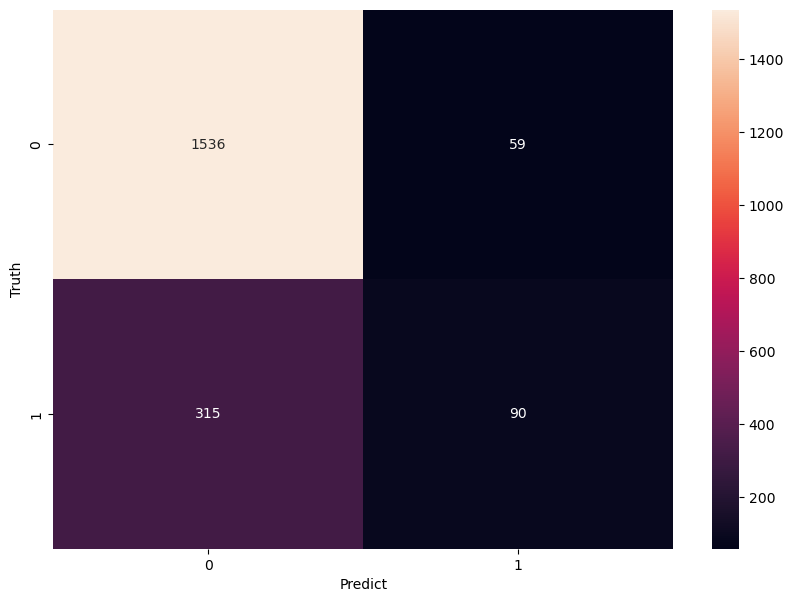

In [51]:
import seaborn as sns
plt.figure(figsize=(10,7));
sns.heatmap(cm,annot=True,fmt='d');
plt.xlabel('Predict')
plt.ylabel('Truth')